<a href="https://colab.research.google.com/github/MostafaNabieh/Rice-Analysis/blob/master/Rice_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline 
import seaborn as sb
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_excel('/content/انواع الارز.xlsx')

In [3]:
df.head(100)

,الأرقام,منطقة,طول المحور,طول المحور.1,اللامركزية,منطقة محدبة,القطر المعادل,مدى,محيط,استدارة,ابعاد متزنة,التصنيف
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,ارز الساعة
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,ارز الساعة
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,ارز الساعة
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,ارز الساعة
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,ارز الساعة
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,4357,104.168804,54.503692,0.852195,4432,74.481573,0.537968,260.732,0.805395,1.911225,ارز الساعة
96,97,4566,107.332301,56.111906,0.852463,4735,76.247044,0.553790,272.888,0.770508,1.912826,ارز الساعة
97,98,3554,94.599434,49.348379,0.853156,3659,67.268814,0.813086,235.807,0.803182,1.916971,ارز الساعة
98,99,4686,108.041169,56.327741,0.853340,4795,77.242479,0.566147,271.738,0.797465,1.918081,ارز الساعة


In [4]:
df.isnull().sum()

الأرقام          0
منطقة            0
طول المحور       0
طول المحور.1     0
اللامركزية       0
منطقة محدبة      0
القطر المعادل    0
مدى              0
محيط             0
استدارة          0
ابعاد متزنة      0
التصنيف          0
dtype: int64

In [5]:
df.dtypes

الأرقام            int64
منطقة              int64
طول المحور       float64
طول المحور.1     float64
اللامركزية       float64
منطقة محدبة        int64
القطر المعادل    float64
مدى              float64
محيط             float64
استدارة          float64
ابعاد متزنة      float64
التصنيف           object
dtype: object

In [6]:
df.describe()

,الأرقام,منطقة,طول المحور,طول المحور.1,اللامركزية,منطقة محدبة,القطر المعادل,مدى,محيط,استدارة,ابعاد متزنة
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845


In [7]:
result=df.groupby('التصنيف').count()
result

,الأرقام,منطقة,طول المحور,طول المحور.1,اللامركزية,منطقة محدبة,القطر المعادل,مدى,محيط,استدارة,ابعاد متزنة
التصنيف,,,,,,,,,,,
ارز الجوهرة,8200,8200,8200,8200,8200,8200,8200,8200,8200,8200,8200
ارز الساعة,9985,9985,9985,9985,9985,9985,9985,9985,9985,9985,9985


In [8]:
!pip install arabic-reshaper
!pip install python-bidi

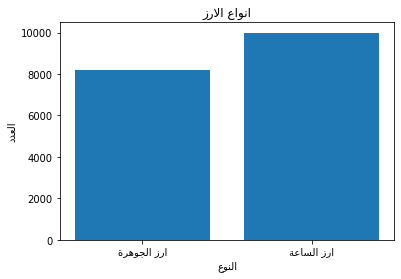

In [9]:
import arabic_reshaper
from bidi.algorithm import get_display
title=get_display(arabic_reshaper.reshape('انواع الارز'))
xlbl = get_display( arabic_reshaper.reshape('العدد'))
ylbl = get_display( arabic_reshaper.reshape('النوع'))
first_type=get_display(arabic_reshaper.reshape('ارز الجوهرة'))
second_type=get_display(arabic_reshaper.reshape('ارز الساعة'))

fig, ax = plt.subplots()

ax.bar(result.index,result.الأرقام)

plt.title(title)
plt.ylabel(xlbl)
plt.xlabel(ylbl)
plt.xticks(np.arange(2), (first_type,second_type))
plt.show()

In [10]:
result_sum=df.groupby('التصنيف').sum()
result_sum

,الأرقام,منطقة,طول المحور,طول المحور.1,اللامركزية,منطقة محدبة,القطر المعادل,مدى,محيط,استدارة,ابعاد متزنة
التصنيف,,,,,,,,,,,
ارز الجوهرة,112971553,68540039,1.260327e+06,573978.966775,7288.152720,70317423,844437.419456,5343.168215,3025524.658,6312.165236,18036.704364
ارز الساعة,52384652,59418586,1.497987e+06,513626.806559,9358.511827,61084075,867370.319937,5870.663408,3368447.714,6562.784618,29227.585246


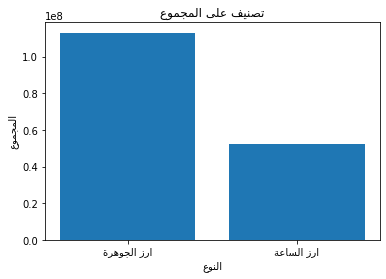

In [11]:
ylabel_SUM=get_display(arabic_reshaper.reshape('المجموع'))
title_Sum= get_display(arabic_reshaper.reshape('تصنيف على المجموع'))

plt.bar(result_sum.index,result_sum.الأرقام)
plt.title(title_Sum)
plt.ylabel(ylabel_SUM)
plt.xlabel(ylbl)
plt.xticks(np.arange(2), (first_type,second_type))
plt.show()

In [12]:
df.shape
y=df['التصنيف']
y
df=df.drop(['الأرقام'],axis=1)
x_train = df


In [13]:
x_train

,منطقة,طول المحور,طول المحور.1,اللامركزية,منطقة محدبة,القطر المعادل,مدى,محيط,استدارة,ابعاد متزنة,التصنيف
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,ارز الساعة
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,ارز الساعة
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,ارز الساعة
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,ارز الساعة
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,ارز الساعة
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,ارز الجوهرة
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,ارز الجوهرة
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,ارز الجوهرة
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,ارز الجوهرة


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)


In [15]:
X_train

,منطقة,طول المحور,طول المحور.1,اللامركزية,منطقة محدبة,القطر المعادل,مدى,محيط,استدارة,ابعاد متزنة,التصنيف
10706,7687,143.976789,69.284962,0.876598,7922,98.931251,0.712287,350.283,0.787279,2.078038,ارز الجوهرة
12300,6789,137.013900,63.967720,0.884326,6964,92.973240,0.811111,327.316,0.796308,2.141923,ارز الجوهرة
3875,5272,139.866494,48.915949,0.936849,5409,81.929963,0.483315,313.742,0.673039,2.859323,ارز الساعة
851,6170,143.791602,55.630724,0.922128,6283,88.633447,0.692403,328.076,0.720354,2.584752,ارز الساعة
17241,6211,137.361333,58.716134,0.904035,6370,88.927447,0.757347,323.000,0.748112,2.339414,ارز الجوهرة
...,...,...,...,...,...,...,...,...,...,...,...
11076,8018,146.777605,70.239402,0.878064,8196,101.038778,0.588477,354.290,0.802709,2.089676,ارز الجوهرة
9297,6248,161.474809,50.103462,0.950643,6415,89.191932,0.511628,353.104,0.629717,3.222827,ارز الساعة
1271,6634,150.776903,56.789536,0.926357,6901,91.905773,0.522074,365.427,0.624287,2.655012,ارز الساعة
8070,6502,161.747379,51.906407,0.947110,6707,90.986832,0.535144,358.414,0.636044,3.116135,ارز الساعة


In [16]:
X_test

,منطقة,طول المحور,طول المحور.1,اللامركزية,منطقة محدبة,القطر المعادل,مدى,محيط,استدارة,ابعاد متزنة,التصنيف
2511,5680,142.869898,51.574544,0.932570,5881,85.041170,0.478114,328.017,0.663385,2.770163,ارز الساعة
1358,6553,150.147273,56.338122,0.926936,6697,91.342973,0.689499,345.585,0.689510,2.665110,ارز الساعة
5559,5553,145.947915,49.285043,0.941258,5728,84.085071,0.587619,334.852,0.622346,2.961302,ارز الساعة
8338,7824,142.730694,70.994171,0.867522,8059,99.808948,0.735338,350.770,0.799087,2.010457,ارز الجوهرة
15832,7912,152.237883,67.276245,0.897057,8159,100.368677,0.596952,362.161,0.758041,2.262877,ارز الجوهرة
...,...,...,...,...,...,...,...,...,...,...,...
2672,5750,143.841091,51.701345,0.933171,5880,85.563587,0.507234,325.510,0.681945,2.782154,ارز الساعة
8170,4094,128.718364,41.207771,0.947371,4212,72.198634,0.462181,282.455,0.644851,3.123643,ارز الساعة
16239,8922,161.610021,70.904980,0.898613,9136,106.582565,0.773539,381.064,0.772105,2.279248,ارز الجوهرة
7741,6365,127.628695,64.258361,0.864007,6500,90.023162,0.760000,312.728,0.817852,1.986180,ارز الجوهرة


In [17]:
y_train

10706    ارز الجوهرة
12300    ارز الجوهرة
3875      ارز الساعة
851       ارز الساعة
17241    ارز الجوهرة
            ...     
11076    ارز الجوهرة
9297      ارز الساعة
1271      ارز الساعة
8070      ارز الساعة
15312    ارز الجوهرة
Name: التصنيف, Length: 14548, dtype: object

In [18]:
y_test

2511      ارز الساعة
1358      ارز الساعة
5559      ارز الساعة
8338     ارز الجوهرة
15832    ارز الجوهرة
            ...     
2672      ارز الساعة
8170      ارز الساعة
16239    ارز الجوهرة
7741     ارز الجوهرة
12197    ارز الجوهرة
Name: التصنيف, Length: 3637, dtype: object

In [19]:
print (X_train.shape, y_train.shape)
print ( X_test.shape, y_test.shape)

(14548, 11) (14548,)
(3637, 11) (3637,)


In [20]:
X_train=X_train.drop('التصنيف',axis=1)

In [21]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
X_test=X_test.drop('التصنيف',axis=1)

In [23]:
y_pred = svclassifier.predict(X_test)

In [24]:
y_pred

array(['ارز الساعة', 'ارز الساعة', 'ارز الساعة', ..., 'ارز الجوهرة',
       'ارز الجوهرة', 'ارز الجوهرة'], dtype=object)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1610   30]
 [  14 1983]]
              precision    recall  f1-score   support

 ارز الجوهرة       0.99      0.98      0.99      1640
  ارز الساعة       0.99      0.99      0.99      1997

    accuracy                           0.99      3637
   macro avg       0.99      0.99      0.99      3637
weighted avg       0.99      0.99      0.99      3637

